In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [26]:
f, U_aus =np.loadtxt('/Users/Peter/Desktop/Python-Kurs/data/243_Frequenzgang.txt', skiprows=1, usecols=(0,1), unpack=True)

In [27]:
D=1e-3
U_ein= 0.2
g=U_aus/(U_ein*D)

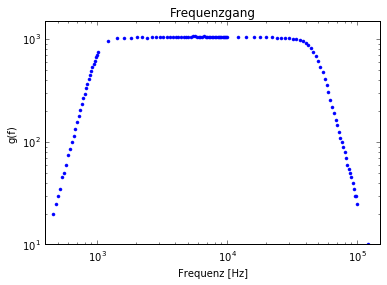

In [28]:
# Wir plotten die Ergebnisse der automatischen Messung
plt.loglog(f[18:],g[18:], linestyle='None', marker='.')
plt.axis([4E2, 1.5e5,10,1.5E3])
plt.xlabel('Frequenz [Hz]')
plt.ylabel('g(f)')
plt.title('Frequenzgang')

In [29]:
# Wir fitten unsere Messdaten an die theoretisch vorhergesagte Funktion
from scipy.optimize import curve_fit
def fit_func(f, V, W1, W2, n1, n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))
p0=[1000,1000,50000,5,5]
popt, pcov = curve_fit(fit_func, f[18:-6], g[18:-6], p0)
print (popt)
print (np.sqrt(pcov[0,0]))

[  1.05382799e+03   1.02177159e+03   4.62697598e+04   4.99646595e+00
   4.63843368e+00]
1.25388827012


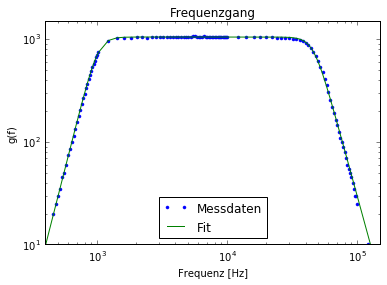

In [30]:
# Wir plotten unsere gefundene Funktion zusammen mit den Daten
plt.loglog(f[18:-6],g[18:-6], linestyle='None', marker='.', label='Messdaten')
plt.loglog(f,fit_func(f, *popt), label='Fit')
plt.axis([4E2, 1.5e5,10,1.5E3])
plt.xlabel('Frequenz [Hz]')
plt.ylabel('g(f)')
plt.title('Frequenzgang')
plt.legend(loc='best')
plt.savefig('/Users/Peter/Desktop/Frequenzgang.pdf', format='pdf')

In [31]:
# Wir integrieren unsere gefundene Fit-Funktion numerisch und geben den Wert des Integrals aus
import scipy.integrate as int
def fit_func_square(f, V, W1, W2, n1, n2):
    return fit_func(f, V, W1, W2, n1, n2)**2

B=int.quad(fit_func_square, f[18], f[-6], args=tuple(popt))
print('Int={value:.4e}'.format(value=B[0]))

Int=5.1227e+10


[  6.12560771e-09   9.00624483e-09   1.06051194e-08   1.45358126e-08
   1.60878388e-08   1.95436664e-08]


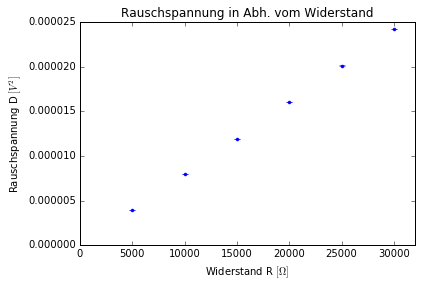

In [52]:
# Wir importieren unsere Werte und zeichnen einen ersten Plot
R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3])
U_aus=np.array([2.428e-3, 3.145e-3, 3.727e-3, 4.239e-3, 4.699e-3, 5.119e-3])
fehler_U_aus=np.array([1.2e-6, 1.4e-6, 1.4e-6, 1.7e-6, 1.7e-6, 1.9e-6])
U_V=1.349e-3
D=(U_aus**2)-((1.394e-3)**2)
fehler_D=np.sqrt((2*U_aus*fehler_U_aus)**2+(2*U_V*7e-7)**2)
print(fehler_D)
plt.errorbar(R,D,yerr=fehler_D, fmt='.')
plt.axis([0, 3.2e4,0,25e-6])
plt.xlabel('Widerstand R $[\Omega]$')
plt.ylabel('Rauschspannung D $[V^2]$')
plt.title('Rauschspannung in Abh. vom Widerstand')

[  8.04495209e-10] [[  2.08528789e-12]]


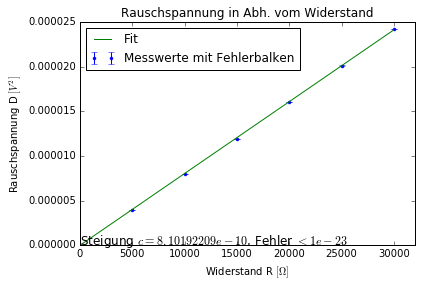

In [56]:
from scipy.optimize import curve_fit
# Wir fitten eine lineare Funktion durch den Ursprung an die Daten und berechnen die Steigung
def linear(c,x):
    return c*x
p0=1e-9
popt, pcov = curve_fit(linear, R, D, p0)
print (popt, np.sqrt(pcov))
plt.errorbar(R,D,yerr=fehler_D, fmt='.', label='Messwerte mit Fehlerbalken')
plt.axis([0, 3.2e4,0,25e-6])
plt.xlabel('Widerstand R $[\Omega]$')
plt.ylabel('Rauschspannung D $[V^2]$')
plt.title('Rauschspannung in Abh. vom Widerstand')
plt.plot(np.linspace(0,30000, 2), linear(np.linspace(0,30000, 2), *popt), label='Fit')
plt.legend(loc='best')
plt.text(1, 0, 'Steigung $c=8.10192209e-10$, Fehler $<1e-23$', fontsize=12)
plt.savefig('/Users/Peter/Desktop/Rauschspannung.pdf', format='pdf')

In [54]:
# Berechne Chi-Quadrat
chisquare=np.sum(((linear(R, *popt)-D)**2/fehler_D**2))
dof=5
chisquare_red=chisquare/dof
print (chisquare)
print(chisquare_red)

440.697745335
88.139549067


In [14]:
# Berechne Fitwahrscheinlichkeit
from scipy.stats import chi2

prob=round(1-chi2.cdf(chisquare,dof),2)*100
print(prob)

0.0
